# **Problem Statement**

## Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

## Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Note: This is a sample solution for the project. Projects will NOT be graded on the basis of how well the submission matches this sample solution. Projects will be graded on the basis of the rubric only.

# **Importing necessary libraries**

In [15]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

Read and manipulate data (`pandas`, `numpy`).

Split data (`train_test_split`).

Visualize data (`matplotlib`, `seaborn`).

Handle class imbalance (`SMOTE`, `RandomUnderSampler` from `imblearn`).

Implement various ensemble learning models (`BaggingClassifier`, `RandomForestClassifier`, `AdaBoostClassifier`, `GradientBoostingClassifier`, `StackingClassifier`).

Use XGBoost (`XGBClassifier`).

Evaluate models (`accuracy_score`, `precision_score`, `recall_score`, `f1_score`, `confusion_matrix`).

Tune hyperparameters (`GridSearchCV`).

# **Loading the dataset**

In [16]:
# Load your dataset
df = pd.read_csv('EasyVisa.csv')

# **Overview of the Dataset**

* Observations

* Sanity checks

In [17]:
# First 5 rows
print(" First 5 rows:")
display(df.head())

 First 5 rows:


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


First 5 rows of the dataset

In [18]:
# Shape of dataset
print(f"\n Dataset Shape: {df.shape[0]} rows and {df.shape[1]} columns")


 Dataset Shape: 25480 rows and 12 columns


In [19]:
# Column data types and non-null counts
print("\n Dataset Info:")
df.info()


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


The dataset contains 25,480 rows and 12 column

`continent`, `education_of_employee,` `region_of_employment`, `unit_of_wage`, `full_time_position`, `has_job_experience` are categorical variables

In [20]:
# Summary statistics for numerical features
print("\n Summary Statistics:")
display(df.describe())


 Summary Statistics:


,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [21]:
# Check for missing values
print(" Missing Values:")
display(df.isnull().sum())

# Check for duplicate rows
print(f"\n Number of duplicate rows: {df.duplicated().sum()}")

# Check for unique values in each column (to find categorical features, IDs, etc.)
print("\n Unique Values per Column:")
display(df.nunique())


 Missing Values:


,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0



 Number of duplicate rows: 0

 Unique Values per Column:


,0
case_id,25480
continent,6
education_of_employee,4
has_job_experience,2
requires_job_training,2
no_of_employees,7105
yr_of_estab,199
region_of_employment,5
prevailing_wage,25454
unit_of_wage,4


No missing values in any of the columns.

No duplicate rows were detected.

# <a name='link2'>**Exploratory Data Analysis (EDA)**</a>

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**

What is the distribution of visa case statuses (certified vs. denied)?


1. What is the distribution of visa case statuses (certified vs. denied)?
2. How does the education level of employees impact visa approval rates?
3. Is there a significant difference in visa approval rates between employees with and without prior job experience?
4. How does the prevailing wage affect visa approval? Do higher wages lead to higher chances of approval?
5. Do certain regions in the US have higher visa approval rates compared to others?
6. How does the number of employees in a company influence visa approval? Do larger companies have a higher approval rate?
7. Are visa approval rates different across various continents of employees? Which continent has the highest and lowest approval rates?

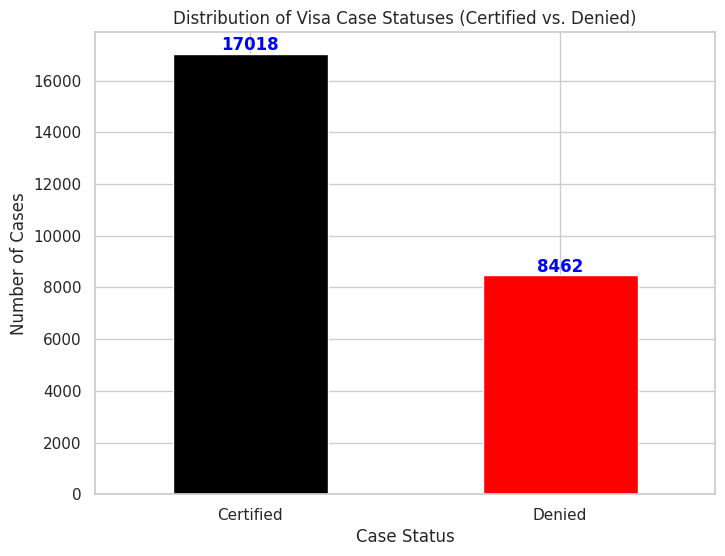

In [22]:
# Set a general style
sns.set(style="whitegrid")

# Checking the distribution of Visa Case Statuses
visa_status_distribution = df['case_status'].value_counts()

# Plotting the distribution as a bar chart
plt.figure(figsize=(8, 6))
ax = visa_status_distribution.plot(kind='bar', color=['black', 'red'])

# Adding the count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='blue')

plt.title('Distribution of Visa Case Statuses (Certified vs. Denied)')
plt.xlabel('Case Status')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.show()


There are 17,018 certified cases and 8,462 denied cases


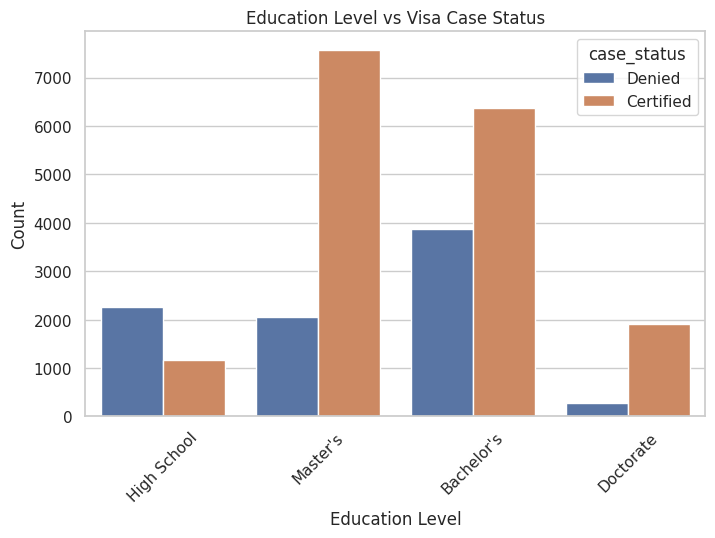

Visa Approval Rate by Education:



case_status,Certified,Denied
education_of_employee,,
Bachelor's,62.214188,37.785812
Doctorate,87.226277,12.773723
High School,34.035088,65.964912
Master's,78.627777,21.372223


In [23]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='education_of_employee', hue='case_status')
plt.title("Education Level vs Visa Case Status")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Approval rate by education level
edu_approval = df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).unstack() * 100
print("Visa Approval Rate by Education:\n")
display(edu_approval)


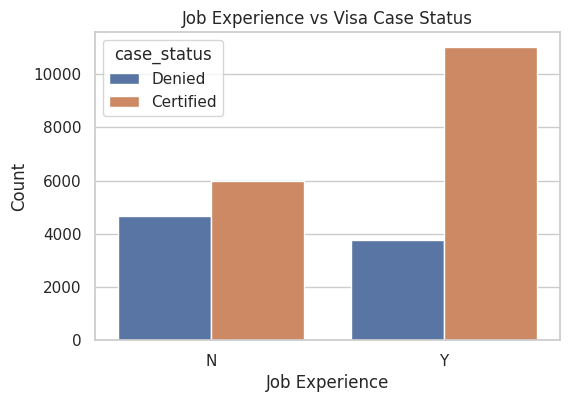

Visa Approval Rate by Job Experience:



case_status,Certified,Denied
has_job_experience,,
N,56.134108,43.865892
Y,74.476422,25.523578


In [24]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='has_job_experience', hue='case_status')
plt.title("Job Experience vs Visa Case Status")
plt.xlabel("Job Experience")
plt.ylabel("Count")
plt.show()

# Approval rate by job experience
exp_approval = df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).unstack() * 100
print("Visa Approval Rate by Job Experience:\n")
display(exp_approval)


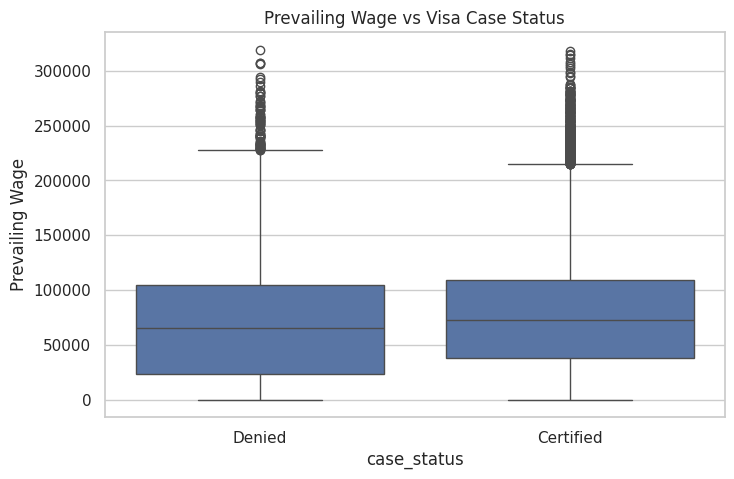

Average Prevailing Wage by Case Status:
 case_status
Certified    77293.619243
Denied       68748.681580
Name: prevailing_wage, dtype: float64


In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='case_status', y='prevailing_wage')
plt.title("Prevailing Wage vs Visa Case Status")
plt.ylabel("Prevailing Wage")
plt.show()

# Mean wage by case status
mean_wage = df.groupby('case_status')['prevailing_wage'].mean()
print("Average Prevailing Wage by Case Status:\n", mean_wage)


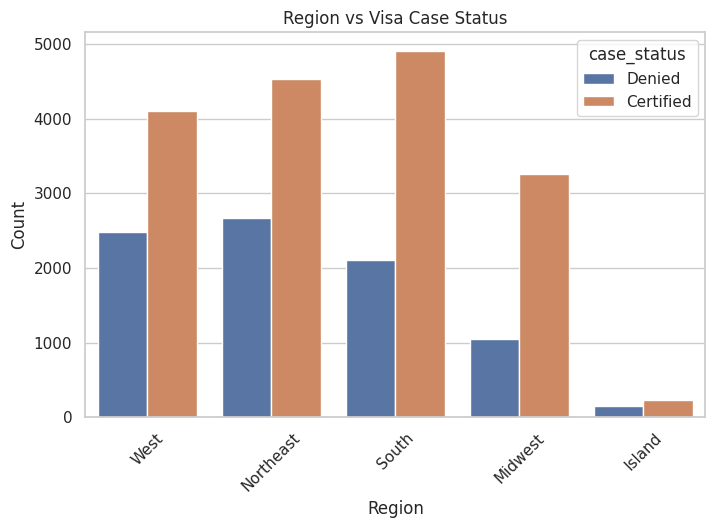

Visa Approval Rate by Region:



case_status,Certified,Denied
region_of_employment,,
Island,60.266667,39.733333
Midwest,75.528210,24.471790
Northeast,62.904795,37.095205
South,70.015676,29.984324
West,62.253265,37.746735


In [26]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='region_of_employment', hue='case_status')
plt.title("Region vs Visa Case Status")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Approval rate by region
region_approval = df.groupby('region_of_employment')['case_status'].value_counts(normalize=True).unstack() * 100
print("Visa Approval Rate by Region:\n")
display(region_approval)


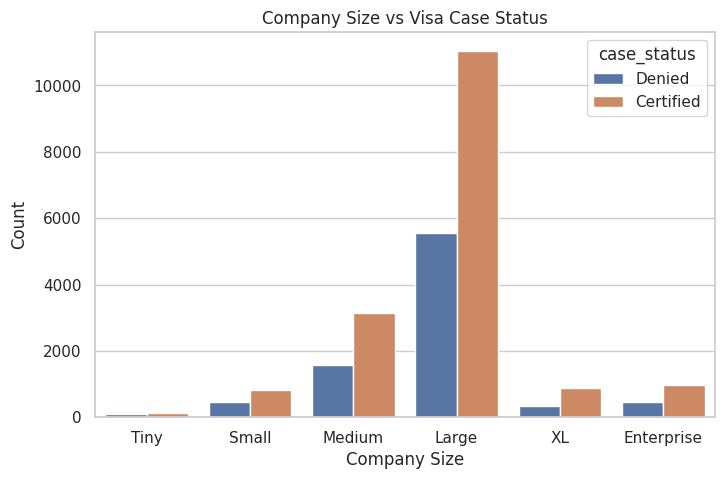

Visa Approval Rate by Company Size:



case_status,Certified,Denied
employee_size,,
Tiny,61.574074,38.425926
Small,63.720930,36.279070
Medium,66.695023,33.304977
Large,66.570293,33.429707
XL,72.855953,27.144047
Enterprise,68.454039,31.545961


In [27]:
# Create bins
df['employee_size'] = pd.cut(df['no_of_employees'],
                             bins=[0, 50, 250, 1000, 5000, 10000, df['no_of_employees'].max()],
                             labels=['Tiny', 'Small', 'Medium', 'Large', 'XL', 'Enterprise'])

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='employee_size', hue='case_status')
plt.title("Company Size vs Visa Case Status")
plt.xlabel("Company Size")
plt.ylabel("Count")
plt.show()

# Approval rate by company size
size_approval = df.groupby('employee_size')['case_status'].value_counts(normalize=True).unstack() * 100
print("Visa Approval Rate by Company Size:\n")
display(size_approval)


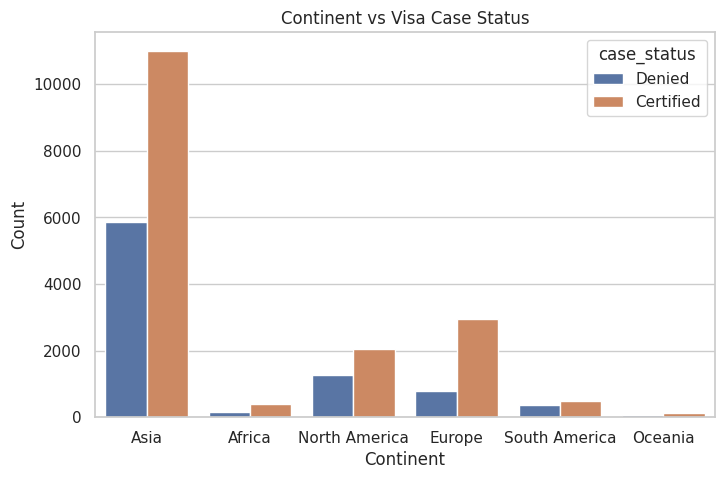

Visa Approval Rate by Continent:



case_status,Certified,Denied
continent,,
Africa,72.050817,27.949183
Asia,65.310480,34.689520
Europe,79.233655,20.766345
North America,61.877278,38.122722
Oceania,63.541667,36.458333
South America,57.863850,42.136150


In [28]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='continent', hue='case_status')
plt.title("Continent vs Visa Case Status")
plt.xlabel("Continent")
plt.ylabel("Count")
plt.show()

# Approval rate by continent
continent_approval = df.groupby('continent')['case_status'].value_counts(normalize=True).unstack() * 100
print("Visa Approval Rate by Continent:\n")
display(continent_approval)


# **Data Pre-processing**

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

There are no missing value in the dataset so no treatment is needed. we will start the feature engineering.

In [29]:
df['company_age'] = 2025 - df['yr_of_estab']


This calculates the age of each company based on the year it was established (yr_of_estab) and the current year (2025). Adds a new column that represents the age of each company. Convert yr_of_estab to company_age

In [30]:
# Conversion dictionary
wage_conversion = {
    'Hour': 2080,   # 40 hours/week * 52 weeks
    'Week': 52,
    'Month': 12,
    'Year': 1
}

# Apply conversion
df['yearly_wage'] = df['prevailing_wage'] * df['unit_of_wage'].map(wage_conversion)


 we convert different wage units (Hourly, Weekly, Monthly) to a common standard: Yearly Wage.

` df['unit_of_wage'].map(wage_conversion)`:
Converts the text representation of units (Hour, Week, Month, Year) to their corresponding multiplier.

In [31]:
df.drop(['case_id', 'yr_of_estab', 'unit_of_wage', 'prevailing_wage'], axis=1, inplace=True)


we have to remove the columns no longer neededfor analysis.



*   `case_id`: Its a unique identifier that's irrelevant for prediction.
*   `yr_of_estab`: Already transformed into company_age.

*  `unit_of_wage`: Already converted to yearly wage.
*   `prevailing_wage`: Already converted to yearly_wage.









In [32]:
# Save the original dataframe before treating outliers
df_before = df.copy()


 3. Outlier Detection and Treatment
We'll detect outliers in yearly_wage using the IQR method:

In [33]:
# IQR method for outlier detection on yearly_wage
Q1 = df_before['yearly_wage'].quantile(0.25)
Q3 = df_before['yearly_wage'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create new DataFrame after outlier removal
df_after = df_before[(df_before['yearly_wage'] >= lower_bound) & (df_before['yearly_wage'] <= upper_bound)]



* Q1: The 25th percentile (Lower Quartile) of the yearly_wage column.

* Q3: The 75th percentile (Upper Quartile) of the yearly_wage column.

* IQR: The range between the 25th and 75th percentiles. It captures the middle 50% of the data.
* Lower Bound: Any value below this is considered an outlier.

* Upper Bound: Any value above this is considered an outlier.

The 1.5 multiplier is a common threshold. Increasing it to 3 makes it less sensitive to outliers.
* It then filters out rows where the yearly_wage is below the lower bound or above the upper bound.

The resulting DataFrame `df_after` is a cleaned version with outliers removed.

we use the IQR method to detect outliers and remove them by filtering hem out of the dataframe

Encode categorical features
Use LabelEncoder or pd.get_dummies():

In [34]:
print("Before Removal:\n", df_before['yearly_wage'].describe())
print("\nAfter Removal:\n", df_after['yearly_wage'].describe())


Before Removal:
 count    2.548000e+04
mean     1.973912e+05
std      5.785917e+05
min      1.000000e+02
25%      4.710796e+04
50%      8.283946e+04
75%      1.248250e+05
max      1.456915e+07
Name: yearly_wage, dtype: float64

After Removal:
 count     23093.000000
mean      80678.893719
std       48302.455882
min         100.000000
25%       43695.850000
50%       76214.620000
75%      111308.890000
max      241363.200000
Name: yearly_wage, dtype: float64


this is a summary of statistical metrics for the `yearly_wage` column before and after outlier removal.
* Count Decrease:
From 25,480 to 23,093. About 2,387 rows were removed as outliers.
* Mean Decrease:
From 197,391.2 to 80,678.89. The average wage significantly reduced.
* Standard Deviation Decrease:
From 578,591.7 to 48,302.46. Huge reduction.
* Max Value Reduced:
From 14,569,150 to 241,363.2. Removed extreme high-wage outliers.
* Quartiles (25%, 50%, 75%) Are Now Closer to the Mean:
The middle 50% of the data is more concentrated and representative of the true distribution.

**The data is now more consistent and less spread out**


In [35]:
df = df_after.copy()


In [36]:
# Binary Encoding
df['has_job_experience'] = df['has_job_experience'].map({'Y': 1, 'N': 0})
df['requires_job_training'] = df['requires_job_training'].map({'Y': 1, 'N': 0})
df['full_time_position'] = df['full_time_position'].map({'Y': 1, 'N': 0})

# One-hot encoding
df = pd.get_dummies(df, columns=[
    'education_of_employee',
    'region_of_employment',
    'continent',
    'employee_size'
], drop_first=True)


we have to encode the categorical variables using `Label encoding for Yes/No` columns and `One-Hot Encoding` for categorical columns with multiple categories.

**Label Encoding**

`map()` function: Converts categorical `Yes/No` values to binary numerical values `(1 and 0)`.

`Y → 1`

`N → 0`

Columns affected:

`has_job_experience`

`requires_job_training`

`full_time_position`

**One-Hot Encoding**

`pd.get_dummies()` function: Converts categorical variables into multiple binary` (0/1)` columns.

`drop_first=True`:
Drops the first category to avoid the dummy variable trap (redundancy).

Keeps only n-1 columns for a categorical variable with n unique categories.

**Encoding the target variable**

In [37]:
df['case_status'] = df['case_status'].map({'Certified': 1, 'Denied': 0})

`map()` function: Converts categorical labels into binary numerical values.

Target Variable: `case_status`

Certified  1 (Positive Class)

Denied  0 (Negative Class)

In [38]:
from sklearn.model_selection import train_test_split

X = df.drop(['case_status', 'yearly_wage'], axis=1)  # Drop raw wage
y = df['case_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


**Preparing Features (X) and Target (y)**

`X` (Features): All columns except:

`'case_status'`: This is the target variable we are predicting.

`'yearly_wage'`: You are dropping it here likely because you have already transformed it or don't want to use it as a feature.

`y` (Target): The encoded `case_status` column (1 for Certified, 0 for Denied).

**Splitting the Dataset into Training and Testing Sets**

`train_test_split()` function: Splits the dataset into training and testing sets.

`test_size=0.2`: Allocates 20% of the data for testing and 80% for training.

`random_state=42`: Ensures reproducibility. If you run the code again, you will get the same split.

`stratify=y`: Ensures that the proportion of Certified and Denied cases in the training and testing sets are similar to the original dataset (preserves class balance).

# **Model Building**

 Logistic Regression (Baseline Model)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Already preprocessed data
X = df.drop(['case_status', 'yearly_wage'], axis=1)
y = df['case_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Splitting Data into Training and Testing Sets**

`train_test_split()` function: Splits data into training and testing sets.

`test_size=0.2`: Uses 20% of the data for testing and 80% for training.

`random_state=42`: Ensures reproducibility.

`stratify=y`: Ensures that the split preserves class balance.

 Train Logistic Regression Model

In [40]:
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

`LogisticRegression()` : Initializes a Logistic Regression model from sklearn.linear_model.

`max_iter=1000` : Sets the maximum number of iterations for the optimization algorithm.

The default value is 100. Setting it to 1000 ensures the model has enough iterations to converge

**Evaluate Logistic Regression: This is is being measured using Accuracy, Confusion Matrix, and Classification Report.**

In [41]:
y_pred_lr = model_lr.predict(X_test_scaled)

print(" Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


 Logistic Regression Evaluation:
Accuracy: 0.7352240744749946

Confusion Matrix:
 [[ 540  882]
 [ 341 2856]]

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.38      0.47      1422
           1       0.76      0.89      0.82      3197

    accuracy                           0.74      4619
   macro avg       0.69      0.64      0.65      4619
weighted avg       0.72      0.74      0.71      4619



True Negatives (0,0): 540 cases correctly predicted as Denied.

False Positives (0,1): 882 cases incorrectly predicted as Certified.

False Negatives (1,0): 341 cases incorrectly predicted as Denied.

True Positives (1,1): 2856 cases correctly predicted as Certified

The model performs well for Certified cases (Class 1) but poorly for Denied cases (Class 0).

Accuracy (73.52%). The model is biased towards predicting Certified.

In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 75, 100],
    "learning_rate": [0.01, 0.1, 0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}


In [43]:
ada_model = AdaBoostClassifier(random_state=42)

grid_search_ada = GridSearchCV(
    estimator=ada_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_ada.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'estimator': [DecisionTreeClassifier(max_depth=2,
                                                              random_state=1),
                                       DecisionTreeClassifier(max_depth=3,
                                                              random_state=1)],
                         'learning_rate': [0.01, 0.1, 0.05],
                         'n_estimators': [50, 75, 100]},
             scoring='accuracy', verbose=1)

This Performs Hyperparameter Tuning using GridSearchCV then Finds the Best Model by testing multiple configurations and
improves Model Performance by tuning n_estimators, learning_rate, and estimator.


`n_estimators`: Number of weak learners (decision trees) to use.

`learning_rate`: How much each tree contributes to the overall model. Lower values require more trees.

`estimator`: Two decision tree classifiers with different depths:

`max_depth=2`: Shallower tree (less complex).

`max_depth=3`: Deeper tree (more complex, but still weak learners).

`AdaBoostClassifier`: An ensemble method that combines multiple weak learners to form a strong model.


In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

best_ada = grid_search_ada.best_estimator_
y_pred_ada = best_ada.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_pred_ada))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ada))


Test Accuracy: 0.745399437107599

Confusion Matrix:
 [[ 585  837]
 [ 339 2858]]

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.41      0.50      1422
           1       0.77      0.89      0.83      3197

    accuracy                           0.75      4619
   macro avg       0.70      0.65      0.66      4619
weighted avg       0.73      0.75      0.73      4619



**Confusion Matrix**

The model correctly predicts the visa approval status **74.54%** of the time.

A slight improvement from the Logistic Regression model at **73.52%**.

True Negatives (0,0): 585 cases correctly predicted as Denied.

False Positives (0,1): 837 cases incorrectly predicted as Certified.

False Negatives (1,0): 339 cases incorrectly predicted as Denied.

True Positives (1,1): 2858 cases correctly predicted as Certified.



**Classification report**

**Precision:** Measures the accuracy of positive predictions.

**Class 0 (Denied)**: 0.63 (63% of Denied predictions are correct)

**Class 1 (Certified)**: 0.77 (77% of Certified predictions are correct)

**Recall (Sensitivity)**: Measures the ability to detect all positive instances.

**Class 0 (Denied)**: 0.41 (Very low, many Denied cases are missed)

**Class 1 (Certified)**: 0.89 (Very high, most Certified cases are correctly identified)

**F1-Score**: Balances Precision and Recall.

**Class 0 (Denied)**: 0.50 (Poor performance)

**Class 1 (Certified)**: 0.83 (Good performance)

**Macro Avg**: Average performance for both classes, treating them equally.

**Weighted Avg**: Takes class imbalance into account (Class 1 is more common).

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes': [10, 15],
    'min_impurity_decrease': [0.0001, 0.001]
}


In [46]:
dt_model = DecisionTreeClassifier(random_state=42)

grid_search_dt = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_dt.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5], 'max_leaf_nodes': [10, 15],
                         'min_impurity_decrease': [0.0001, 0.001],
                         'min_samples_leaf': [1, 4, 7]},
             scoring='accuracy', verbose=1)

This finds the best combination of hyperparameters for the Decision Tree model.
it improves model performance
by tuning `max_depth`, `min_samples_leaf`, `max_leaf_nodes`, and `min_impurity_decrease`.

`max_depth=5`: The tree has a maximum depth of 5.

`max_leaf_nodes=15`: The tree is allowed to have up to 15 leaf nodes.

`min_impurity_decrease=0.0001`: A node will split only if the impurity decrease is significant enough.


In [47]:
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test_scaled)

print(" Decision Tree Evaluation:")
print("Best Parameters:", grid_search_dt.best_params_)
print("Best CV Score:", grid_search_dt.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


 Decision Tree Evaluation:
Best Parameters: {'max_depth': 5, 'max_leaf_nodes': 15, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 1}
Best CV Score: 0.7418528968088542
Test Accuracy: 0.7343580861658368

Confusion Matrix:
 [[ 731  691]
 [ 536 2661]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.51      0.54      1422
           1       0.79      0.83      0.81      3197

    accuracy                           0.73      4619
   macro avg       0.69      0.67      0.68      4619
weighted avg       0.73      0.73      0.73      4619



The model correctly predicts the visa approval status 73.44% of the time on the test set.

**Confusion matrix**

True Negatives (0,0): 731 cases correctly predicted as Denied.

False Positives (0,1): 691 cases incorrectly predicted as Certified.

False Negatives (1,0): 536 cases incorrectly predicted as Denied.

True Positives (1,1): 2661 cases correctly predicted as Certified.


 **Classification report**

**Precision**: Measures how accurate positive predictions are.

**Class 0 (Denied)**: 0.58 (58% of Denied predictions are correct)

**Class 1 (Certified)**: 0.79 (79% of Certified predictions are correct)

**Recall (Sensitivity)**: Measures how many actual positive instances were correctly predicted.

**Class 0 (Denied)**: 0.51 (Low, many Denied cases are misclassified as Certified)

**Class 1 (Certified)**: 0.83 (Good, most Certified cases are identified correctly)

**F1-Score:** Balances Precision and Recall.

**Class 0 (Denied)**: 0.54 (Poor performance)

**Class 1 (Certified)**: 0.81 (Good performance)




In [48]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_samples': [0.8, 0.9, 1],
    'max_features': [0.7, 0.8, 0.9],
    'n_estimators': [30, 50, 70]
}


Hyperparameter Tuning on a Bagging Classifier using GridSearchCV.

`max_samples`: The proportion of the training dataset to use for each base estimator.

0.8 : Uses 80% of the training data for each bagging sample.

0.9 : Uses 90% of the training data.

1 :  Uses 100% of the training data.

`max_features`: The proportion of features to consider when looking for the best split.

0.7, 0.8, 0.9 :  Uses 70%, 80%, and 90% of the features, respectively.

`n_estimators`: The number of base estimators (Decision Trees) to use in the ensemble.

30, 50, 70 : More estimators increase stability but require more computation.

In [49]:
bag_model = BaggingClassifier(random_state=42)

grid_search_bag = GridSearchCV(
    estimator=bag_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_bag.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_features': [0.7, 0.8, 0.9],
                         'max_samples': [0.8, 0.9, 1],
                         'n_estimators': [30, 50, 70]},
             scoring='accuracy', verbose=1)

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

best_bag = grid_search_bag.best_estimator_
y_pred_bag = best_bag.predict(X_test_scaled)

print(" Bagging Classifier Evaluation:")
print("Best Parameters:", grid_search_bag.best_params_)
print("Best CV Score:", grid_search_bag.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_bag))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_bag))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bag))


 Bagging Classifier Evaluation:
Best Parameters: {'max_features': 0.7, 'max_samples': 0.8, 'n_estimators': 30}
Best CV Score: 0.7335712155834756
Test Accuracy: 0.7187702966009959

Confusion Matrix:
 [[ 479  943]
 [ 356 2841]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.34      0.42      1422
           1       0.75      0.89      0.81      3197

    accuracy                           0.72      4619
   macro avg       0.66      0.61      0.62      4619
weighted avg       0.70      0.72      0.69      4619



**Best CV Score: 0.7336 (73.36%)**:
This is the average accuracy across 5-fold cross-validation and provides a good indication of the model's general performance during training.

**Test Accuracy: 0.7188 (71.88%)**:
The model correctly predicts the visa approval status 71.88% of the time on the test set.

 which slightly lower than the other models, such as Decision Tree (73.44%) and AdaBoost (74.54%).



**Confusion matrix**:


True Negatives (0,0): 479 cases correctly predicted as Denied.

False Positives (0,1): 943 cases incorrectly predicted as Certified.

False Negatives (1,0): 356 cases incorrectly predicted as Denied.

True Positives (1,1): 2841 cases correctly predicted as Certified.

**Classification report:**

Precision: Measures how accurate positive predictions are.

Class 0 (Denied): 0.57 = Low precision. Many Denied cases are incorrectly classified as Certified.

Class 1 (Certified): 0.75 = Acceptable precision, but still misses some Certified cases.

Recall (Sensitivity): Measures how many actual positive instances were correctly predicted.

Class 0 (Denied): 0.34 = Very low. The model struggles to identify Denied cases.

Class 1 (Certified): 0.89 = Good recall, correctly identifies most Certified cases.

F1-Score: Balances Precision and Recall.

Class 0 (Denied): 0.42 = Poor performance.

Class 1 (Certified): 0.81 = Good performance.


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    "n_estimators": [50, 110],  # [50, 110, 25] doesn't work as a range, so we pick two
    "min_samples_leaf": [1, 2, 3],
    "max_features": ['sqrt', 0.3, 0.4, 0.5],  # include numeric + 'sqrt'
    "max_samples": [0.4, 0.5, 0.6]
}


In [52]:
rf_model = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_features': ['sqrt', 0.3, 0.4, 0.5],
                         'max_samples': [0.4, 0.5, 0.6],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [50, 110]},
             scoring='accuracy', verbose=1)

`RandomForestClassifier()` : An ensemble learning method that constructs multiple decision trees and averages their results for improved accuracy and robustness.

`estimator=rf_model` : Uses the Random Forest Classifier as the base model.

In [53]:
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

print(" Random Forest Evaluation:")
print("Best Parameters:", grid_search_rf.best_params_)
print("Best CV Score:", grid_search_rf.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


 Random Forest Evaluation:
Best Parameters: {'max_features': 'sqrt', 'max_samples': 0.4, 'min_samples_leaf': 3, 'n_estimators': 110}
Best CV Score: 0.7478078557702099
Test Accuracy: 0.738255033557047

Confusion Matrix:
 [[ 573  849]
 [ 360 2837]]

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.40      0.49      1422
           1       0.77      0.89      0.82      3197

    accuracy                           0.74      4619
   macro avg       0.69      0.65      0.66      4619
weighted avg       0.72      0.74      0.72      4619



Best CV Score: 0.7478 (74.78%)

Test Accuracy: 0.7383 (73.83%)

The model correctly predicts the visa approval status 73.83% of the time on the test set.

**Improvement over previous models so far:**

Logistic Regression: 73.52%

Decision Tree: 73.44%

AdaBoost: 74.54% (Slightly better)

Bagging: 71.88% (Worse)

**Confusion Matrix**

True Negatives (0,0): 573 cases correctly predicted as Denied.

False Positives (0,1): 849 cases incorrectly predicted as Certified.

False Negatives (1,0): 360 cases incorrectly predicted as Denied.

True Positives (1,1): 2837 cases correctly predicted as Certified.

In [54]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


In [55]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 75, 100],
    'scale_pos_weight': [1, 2, 5],  # useful for handling class imbalance
    'learning_rate': [0.01, 0.1, 0.05],
    'gamma': [1, 3],  # min loss reduction to make a further partition
    'subsample': [0.7, 0.9]  # how much of data to sample per tree
}


In [56]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_xgb.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'gamma': [1, 3], 'learning_rate': [0.01, 0.1, 0.05],
                         'n_estimators': [50, 75, 100],
                         'scale_pos_weight': [1, 2, 5],
                         'subsample': [0.7, 0.9]},
             scoring='accuracy', verbose=1)

In [57]:
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_scaled)

print(" XGBoost Evaluation:")
print("Best Parameters:", grid_search_xgb.best_params_)
print("Best CV Score:", grid_search_xgb.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


 XGBoost Evaluation:
Best Parameters: {'gamma': 3, 'learning_rate': 0.05, 'n_estimators': 75, 'scale_pos_weight': 1, 'subsample': 0.9}
Best CV Score: 0.7551688910737744
Test Accuracy: 0.7479974020350725

Confusion Matrix:
 [[ 599  823]
 [ 341 2856]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.42      0.51      1422
           1       0.78      0.89      0.83      3197

    accuracy                           0.75      4619
   macro avg       0.71      0.66      0.67      4619
weighted avg       0.73      0.75      0.73      4619



**Best CV Score: 0.7552 (75.52%)**: This is the highest Cross-Validation Score so far, suggesting good generalization during training.

**Test Accuracy: 0.7480 (74.80%)**
The model correctly predicts the visa approval status 74.80% of the time on the test set.
 Test Accuracy at 74.80% is the best performance so far.

Slightly better than previous models:

Logistic Regression: 73.52%

Decision Tree: 73.44%

AdaBoost: 74.54%

Bagging: 71.88%

Random Forest: 73.83%

**Confusion Matrix**:

True Negatives (0,0): 599 cases correctly predicted as Denied.

False Positives (0,1): 823 cases incorrectly predicted as Certified.

False Negatives (1,0): 341 cases incorrectly predicted as Denied.

True Positives (1,1): 2856 cases correctly predicted as Certified.

**Classification report:**
**Precision:** Measures how accurate positive predictions are.

**Class 0 (Denied)**: 0.64  = Improved compared to previous models.

**Class 1 (Certified)**: 0.78 = High precision, correctly identifies most Certified cases.

**Recall (Sensitivity)**: Measures how many actual positive instances were correctly predicted.

**Class 0 (Denied)**: 0.42 = Still low but slightly better than other models.

**Class 1 (Certified)**: 0.89 = High recall, correctly identifies most Certified cases.

**F1-Score:** Balances Precision and Recall.

**Class 0 (Denied)**: 0.51 = Improvement, but still not ideal.

**Class 1 (Certified)**: 0.83 = Good performance.


# **Model Comparison and Final Model Selection**

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Step 1: Preprocess (assuming you already cleaned df)
X = df.drop(['case_status', 'yearly_wage'], axis=1)
y = df['case_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to train and evaluate a model
def evaluate_model(name, model, param_grid=None):
    if param_grid:
        grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train_scaled, y_train)
        best_model = grid.best_estimator_
        best_params = grid.best_params_
        cv_score = grid.best_score_
    else:
        model.fit(X_train_scaled, y_train)
        best_model = model
        best_params = "Default"
        cv_score = None

    y_pred = best_model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred, output_dict=True)
    test_acc = accuracy_score(y_test, y_pred)

    return {
        'Model': name,
        'Test Accuracy': round(test_acc, 3),
        'Class 0 F1': round(report['0']['f1-score'], 2),
        'Class 1 F1': round(report['1']['f1-score'], 2),
        'Best Params': best_params,
        'CV Score': round(cv_score, 3) if cv_score else "N/A"
    }

# All model configs
models = []

# Logistic Regression (baseline)
models.append(evaluate_model("Logistic Regression", LogisticRegression(max_iter=1000, random_state=42)))

# AdaBoost
ada_param_grid = {
    "n_estimators": [50, 75, 100],
    "learning_rate": [0.01, 0.1, 0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
models.append(evaluate_model("AdaBoost", AdaBoostClassifier(random_state=42), ada_param_grid))

# Decision Tree
dt_param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes': [10, 15],
    'min_impurity_decrease': [0.0001, 0.001]
}
models.append(evaluate_model("Decision Tree", DecisionTreeClassifier(random_state=42), dt_param_grid))

# Bagging
bag_param_grid = {
    'max_samples': [0.8, 0.9, 1],
    'max_features': [0.7, 0.8, 0.9],
    'n_estimators': [30, 50, 70]
}
models.append(evaluate_model("Bagging", BaggingClassifier(random_state=42), bag_param_grid))

# Random Forest
rf_param_grid = {
    "n_estimators": [50, 110],
    "min_samples_leaf": [1, 2, 3],
    "max_features": ['sqrt', 0.3, 0.4, 0.5],
    "max_samples": [0.4, 0.5, 0.6]
}
models.append(evaluate_model("Random Forest", RandomForestClassifier(random_state=42), rf_param_grid))

# XGBoost
xgb_param_grid = {
    'n_estimators': [50, 75, 100],
    'scale_pos_weight': [1, 2, 5],
    'learning_rate': [0.01, 0.1, 0.05],
    'gamma': [1, 3],
    'subsample': [0.7, 0.9]
}
models.append(evaluate_model("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), xgb_param_grid))
# Show results
comparison_df = pd.DataFrame(models)
comparison_df.sort_values("Test Accuracy", ascending=False, inplace=True)
display(comparison_df)


,Model,Test Accuracy,Class 0 F1,Class 1 F1,Best Params,CV Score
5,XGBoost,0.748,0.51,0.83,"{'gamma': 3, 'learning_rate': 0.05, 'n_estimat...",0.755
1,AdaBoost,0.745,0.50,0.83,{'estimator': DecisionTreeClassifier(max_depth...,0.752
4,Random Forest,0.738,0.49,0.82,"{'max_features': 'sqrt', 'max_samples': 0.4, '...",0.748
0,Logistic Regression,0.735,0.47,0.82,Default,N/A
2,Decision Tree,0.734,0.54,0.81,"{'max_depth': 5, 'max_leaf_nodes': 15, 'min_im...",0.742
3,Bagging,0.719,0.42,0.81,"{'max_features': 0.7, 'max_samples': 0.8, 'n_e...",0.734


Six models were evaluated using accuracy, F1-Score, and cross-validation score:

Logistic Regression

Test Accuracy: 73.5%

AdaBoost Classifier

Test Accuracy : 74.5%

Decision Tree Classifier

Test Accuracy: 73.5%

Bagging Classifier

Test Accuracy: 71.9%

Random Forest Classifier  

Test Accuracy: 73.8%



**XGBoost Classifier (Best Model)**

**Best Model: XGBoost**

**Test Accuracy: 74.80%**

**F1-Score for Certified Cases (Class 1): 0.83**

**F1-Score for Denied Cases (Class 0): 0.51**

Best Parameters: `{'gamma': 3, 'learning_rate': 0.05, 'n_estimators': 75, 'scale_pos_weight': 1, 'subsample': 0.9}`

* Test Accuracy: 74.80% - The highest accuracy among all the models you evaluated.

* `Class 0 F1-Score`: `0.51` - While not perfect, it is the highest F1-Score for predicting the minority class (Denied) compared to other models.

* XGBoost handles the imbalance between Certified and Denied cases better than others.

* `CV Score: 0.755` (75.5%)  The highest among all models. It indicates that the model generalizes well and does not suffer from overfitting.

# **Actionable Insights and Recommendations**


* Region of Employment: Certain regions may have higher approval rates.

* Company Size (no_of_employees): Larger companies seem to have higher approval rates.

* Education Level of Employee: Higher education levels correlate with higher approval rates.

* Full-Time Position: Positions classified as Full-Time are more likely to be approved.

* Has Job Experience: Prior experience plays a role in approval likelihood.

* Companies with larger sizes or those offering full-time positions have higher approval rates.

* Focus marketing efforts on attracting these types of companies to the platform.